# A sandbox to test code, post ideas, etc. 

#### Libraries

In [14]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline


#from sklearn's...
from sklearn.feature_extraction.text import CountVectorizer #Convert a collection of text documents to a matrix of token counts.
from sklearn.feature_extraction.text import TfidfTransformer #Transform a count matrix to a normalized tf or tf-idf representation
from sklearn.feature_extraction.text import TfidfVectorizer #Convert a collection of raw documents to a matrix of TF-IDF features
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.naive_bayes import ComplementNB
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.preprocessing import Normalizer
import random


*We have three datasets we are using; training (**train_ds**), testing (**test_ds**), and testing labels (**test_labels_ds**)*

#### Load training and test dataframes from file; preprocessing completed in 'text_preprocessing' notebook

In [15]:
file_object = open('clean_data1.p', 'rb')
clean_data = pickle.load(file_object)
train_df = clean_data[0]
test_df = clean_data[1]
test_lab = clean_data[2]


In [16]:
train_df.head(3)

,comment_text,non_toxic,overall_toxic
0,explanation edit make username hardcore metall...,1,0
1,daww match background colour im seemingly stic...,1,0
2,hey man im really try edit war guy constantly ...,1,0


In [19]:
#print(train_ds[['toxicity_level']].value_counts())

toxicity_level
4                 1595
1                 1433
3                 1370
2                  931
dtype: int64


In [17]:
test_df.head(3)

,id,comment_text
0,00001cee341fdb12,yo bitch ja rule succesful youll ever whats ha...
1,0000247867823ef7,rfc title fine imo
2,00013b17ad220c46,source zawe ashton lapland —


In [18]:
test_lab.shape

(153164, 2)

In [19]:
test_lab.head(2)

,non_toxic,overall_toxic
0,2,1
1,2,1


## Subsets of data

Subset1: Create a subsample of data for quickened runtime with 1000 samples

In [20]:
#subset of testing data; removed the id column
train_df_subset = train_df.loc[1:1000,'comment_text']
train_lab_subset = train_df.loc[1:1000,'overall_toxic']

#subset of testing data; removed the id column
test_df_subset = test_df.loc[1:1000,'comment_text']
test_lab_subset = test_lab.loc[1:1000,'overall_toxic']

Subset2: 

63978
63978


Subset3: Create a subsample of data for quickened run time with toxcity_level as label

In [22]:
'''
#subset of testing data; removed the id column
subset3 = train_df.sample(n = 1000, random_state= 123)
train_df_subset3 = subset3['comment_text']
train_lab_subset3 = subset3['toxicity_level']

#subset of testing data; removed the id column
subset3_test = test_df.sample(n = 1000, random_state= 123)
subset3_test_lab = test_lab.sample(n = 1000, random_state= 123)
train_df_subset3 = subset3_test['comment_text']
train_lab_subset3 = subset3_test_lab['toxicity_level']
'''

In [23]:
#train_df_subset3.shape

(1000,)

In [6]:
#train_df.loc[:,'toxic':'identity_hate'].sum(axis =1).unique()

array([0, 4, 1, 3, 2, 5, 6], dtype=int64)

In [ ]:
#Could convert the comment labels to one label

In [7]:
#train_df[(train_df['toxic'] == 1) & (train_df['identity_hate'] == 1)]

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
42,001810bf8c45bf5f,gay antisemmitian archangel white tiger meow g...,1,0,1,0,1,1
105,00472b8e2d38d1ea,pair jewhating weiner nazi schmuck,1,0,1,0,1,1
176,006b94add72ed61c,think fagget get oife burn hell hate sorry can...,1,0,1,1,1,1
218,008e0818dde894fb,kill nigger hard others say include racist som...,1,0,1,0,1,1
238,0097dd5c29bf7a15,u r tw fuck u gay boyu r smellyfuck ur mum poopie,1,0,1,0,1,1
...,...,...,...,...,...,...,...,...
159281,fb726deec64157bd,lol youre gay never know good feel fuck woman as,1,1,1,0,1,1
159336,fc3efa2f6f025f6d,oh fuck pansy jew would whine bnai brith beat ...,1,0,1,0,1,1
159400,fd052883fa6a8697,shalom semite get fuck kill son bitch dont lea...,1,1,1,1,1,1
159449,fdce660ddcd6d7ca,think gay fag,1,0,0,0,0,1


### Sample how we did it in homework just on 5 comments as corpus

##### Get term count matrix along with terms array

In [21]:
corpus = train_df['comment_text']
c1 = corpus.head(5)
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(c1)
terms = vectorizer.get_feature_names_out()
terms

array(['accident', 'actual', 'appear', 'article', 'background', 'backlog',
       'cant', 'care', 'chance', 'closure', 'colour', 'constantly',
       'date', 'daww', 'delay', 'doll', 'dont', 'edit', 'eg', 'else',
       'etc', 'exact', 'explanation', 'fac', 'fan', 'first', 'form',
       'format', 'gas', 'guess', 'guy', 'hardcore', 'hero', 'hey', 'ie',
       'im', 'improvement', 'info', 'information', 'instead', 'january',
       'know', 'later', 'let', 'list', 'make', 'man', 'match', 'may',
       'metallica', 'need', 'new', 'noone', 'page', 'please',
       'preference', 'real', 'really', 'reference', 'relevant',
       'remember', 'remove', 'retire', 'revert', 'review', 'reviewer',
       'section', 'seem', 'seemingly', 'since', 'sir', 'statistic',
       'stick', 'style', 'subsection', 'suggestion', 'talk', 'template',
       'thank', 'thats', 'think', 'tidy', 'try', 'turn', 'type',
       'username', 'utc', 'vandalism', 'vote', 'want', 'war', 'werent',
       'wikipediagoodarticl

In [22]:
X = pd.DataFrame(X.toarray())
X

,0,1,2,3,4,5,6,7,8,9,...,85,86,87,88,89,90,91,92,93,94
0,0,0,0,0,0,0,0,0,0,1,...,1,0,1,1,0,0,1,0,0,1
1,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1,0,1,1,0,1,1,0,0,0,...,0,0,0,0,1,0,0,1,1,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


#### Get TFIDF matrix as dataframe

In [23]:
tfidfTransform = TfidfTransformer()
X_tfidf = tfidfTransform.fit_transform(X)
X_tfidf = pd.DataFrame(X_tfidf.toarray())
X_tfidf

,0,1,2,3,4,5,6,7,8,9,...,85,86,87,88,89,90,91,92,93,94
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.208745,...,0.208745,0.000000,0.208745,0.208745,0.000000,0.000000,0.208745,0.000000,0.000000,0.208745
1,0.000000,0.000000,0.000000,0.000000,0.317869,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.317869,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.222236,0.000000,0.000000,0.000000,0.000000,0.000000,0.222236,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.222236,0.000000,0.000000,0.000000,0.000000
3,0.132673,0.000000,0.132673,0.132673,0.000000,0.132673,0.132673,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.132673,0.000000,0.000000,0.132673,0.132673,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.428411,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [24]:
DT_tfidf = X_tfidf.T
DT_tfidf = np.array(DT_tfidf)

In [31]:
pca = PCA(n_components=5)
DTtrans = pca.fit(DT_tfidf).transform(DT_tfidf)
varPercentage = pca.explained_variance_ratio_*100
print(varPercentage)

[26.53396784 25.476927   23.90741835 21.10656234  2.97512447]


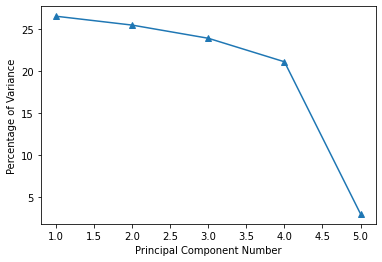

In [33]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(range(1, 6), varPercentage, marker='^')
plt.xlabel('Principal Component Number')
plt.ylabel('Percentage of Variance')
plt.show()

## Using Pipelines for analysis

In [ ]:
#ComplementNB()
'''
Typically out performs Multinomial Naive Bayes with text data. Hyperparameter to tune is alpha (Laplace smoothing). 
The default = 1 (new tokens in the test data that were not in the training data are ignored). A large alpha pushes the token to 50/50
which is not useful information.
If our comments were longer text we could use the second normalization.
'''


#### Parameter dictionaries


* max_df: ignore terms that have a document frquency strictly higher than the given threshold  
* min_df: ignore terms that have a document frequency strictly lower than the given threshold

Naive Bayes

In [34]:
# Input is a selected combination from Stage 1(Preprocessing) & Stage 2(Sampling).

# Tuning Stage 4 unable to complete with Naive Bayes as cannot pass negative values to NB

# Stage 3 hyperparameter tunning

# Hyperparameter tunning

# parameters for CountVectorizer()
countvect_params = {
    'count__min_df': [1, 3, 10], 
    'count__max_df': [0.6, 0.8, 0.9]
    
}

# parameters for TfidfVectorizer()
vectorizer_params = {
    'vect__min_df': [1, 3, 10], 
    'vect__max_df': [0.6, 0.8, 0.9],
    'vect__norm': ['l1','l2']
}

# parameters for Complimentary Naive Bayes()
compNB_params = {
    'alpha' : [1, 10, 100]
}

KNN

In [35]:
# Input is a selected combination from Stage 1(Preprocessing) & Stage 2(Sampling).
# Tuning Stage 4 (best number of dimensions occurs after Stage 1 & 2)

# Stage 3 & 4 tunning and hyperparameter tunning

#Hyperparameter tunning

#Token 
min_DF = [1, 3, 10]
max_DF = [0.6, 0.8, 0.9]
#norm = ['l1','l2']

#Dimensionality Recudtion
n_components = [1,2,3,4]

#Classifer 
n_neighbors = [5, 10]

#Parameter dictionary for KNN Pipeline
KNN_params =[
    {
        'token_value': [CountVectorizer(), TfidfVectorizer()],
        'token_value__min_df': min_DF,
        'token_value__max_df': max_DF,
        'reduce_dim': ['passthrough'],
        'clf__n_neighbors': n_neighbors
    },
    {
        'token_value': [CountVectorizer(), TfidfVectorizer()],
        'token_value__min_df': min_DF,
        'token_value__max_df': max_DF,
        'reduce_dim': [TruncatedSVD()],
        'reduce_dim__n_components': n_components,
        'clf__n_neighbors': n_neighbors
    }
]

Rocchio

In [36]:
# Input is a selected combination from Stage 1(Preprocessing) & Stage 2(Sampling).
# Tuning Stage 4 (best number of dimensions occurs after Stage 1 & 2)

# Stage 3 & 4 tunning and hyperparameter tunning

#Hyperparameter tunning

#Token 
min_DF = [1, 3, 10]
max_DF = [0.6, 0.8, 0.9]
#norm = ['l1','l2']

#Dimensionality Recudtion
n_components = [2,5]

#Classifer 
metric = ['euclidian', 'cosine']

#Parameter dictionary for KNN Pipeline
Rocchio_params =[
    {
        'token_value': [CountVectorizer(), TfidfVectorizer()],
        'token_value__min_df': min_DF,
        'token_value__max_df': max_DF,
        'reduce_dim': ['passthrough'],
        'clf__metric': metric
    },
    {
        'token_value': [CountVectorizer(), TfidfVectorizer()],
        'token_value__min_df': min_DF,
        'token_value__max_df': max_DF,
        'reduce_dim': [TruncatedSVD()],
        'reduce_dim__n_components': n_components,
        'clf__metric': metric
    }
]

#### Pipelines

In [37]:

# pipeline using term counts and complimentary Naive Bayes
pipe_CountVect_CompNB = Pipeline([
    ('count', CountVectorizer()),
    ('clf', ComplementNB())
    ])

# pipeline using Tfidf and complimentary Naive Bayes
pipe_TfidfVect_CompNB = Pipeline([
    ('vect', TfidfVectorizer()),
    ("clf", ComplementNB())
    ])

# KNN Pipeline
pipe_KNN = Pipeline(
    [
        ('token_value', 'passthrough'),
        ('reduce_dim', 'passthrough'),
        ('clf', KNeighborsClassifier())
    ]
)

# Rocchio Pipeline
pipe_Rocchio = Pipeline(
    [
        ('token_value', 'passthrough'),
        ('reduce_dim', 'passthrough'),
        ('clf', NearestCentroid())
    ]
)

### Reference dictionaries

In [40]:
#dictionary of different subsets of the data
subsets = {
    'subset1': [train_df_subset, train_lab_subset, test_df_subset, test_lab_subset],
        # filter: only 1000 instances per df
        # filter: only 'toxic' labels used
    #'subset2': [train_df_subset2, train_lab_subset2, test_df_subset2, test_lab_subset2],
        # filter: labels with -1 were removed from test set
        # filter: only 'toxic' labels used
    #'subset3': [train_df_subset3, train_lab_subset3, test_df_subset3, test_lab_subset3],
        # filter : only 1000 instances per df
        # filter : toxicity levels as labels used
}

#list of parameter dictionaries
parameters = [
    countvect_params,
    vectorizer_params,
    KNN_params,
    Rocchio_params
    ]

#list of different pipelines
pipelines = [
    pipe_CountVect_CompNB,
    pipe_TfidfVect_CompNB,
    pipe_KNN,
    pipe_Rocchio
    ]

#pipeline with parameter dictionary
pipe_parm_dict = {
    'CountVect_CompNB': [pipe_CountVect_CompNB, countvect_params],
    'TfidfVect_CompNB': [pipe_TfidfVect_CompNB, vectorizer_params],
    'KNN_pipeline': [pipe_KNN, KNN_params],
    'Rocchio_pipeline': [pipe_Rocchio, Rocchio_params]
}

In [41]:
def run_on_subset(pipe_params, subset):
    'perform the pipeline(transform curpus to matrix and use to make model, use on test data) using the parameter dictionary on the data'

    #set variables from input
    pipe, parameters = pipe_params
    train_data, train_labels, test_data, test_labels = subset
    
    def gridSearch(pipe, parameters):
        'runs the randomized search CV function with input pipe and parameters'

        grid_search = GridSearchCV(
            estimator = pipe,
            param_grid = parameters,
            n_jobs = 2,  
        )
        return grid_search
    
    #set Randomized Search CV with input pipe and parameters
    grid_search = gridSearch(pipe, parameters)
    #fit the data to the model through the pipe and randomized CV
    grid_search.fit(train_data,train_labels)

    best_parameters = grid_search.best_estimator_.get_params()
    print('Pipeline = {}'.format(pipe))
    
    #formating print statments
    print('Best parameters = ')
    bestparams = []
    if type(parameters) is list:
        for param_dict in parameters:
            if type(param_dict) is dict:
                for param_name in sorted(param_dict.keys()):
                    if param_name in best_parameters.keys():
                        x = str(param_name) + ': ' + str(best_parameters[param_name])
                        if x not in bestparams:
                            bestparams.append(x)
        print(*bestparams, sep = '\n')
                #print(f"{param_name}: {best_parameters[param_name]}")
    else:
        for param in sorted(parameters.keys()):
            print(f"{param}: {best_parameters[param]}")
                        

    test_accuracy = grid_search.score(test_data, test_labels)
    print(
        "Accuracy of the best parameters using the inner CV of "
        f"the random search: {grid_search.best_score_:.3f}"
    )
    print(f"Accuracy on test set: {test_accuracy:.3f}")
    return
    

#### Model tuning on sample subset1

In [42]:
run_on_subset(pipe_parm_dict['CountVect_CompNB'], subsets['subset1'])

Pipeline = Pipeline(steps=[('count', CountVectorizer()), ('clf', ComplementNB())])
Best parameters = 
count__max_df: 0.6
count__min_df: 1
Accuracy of the best parameters using the inner CV of the random search: 0.902
Accuracy on test set: 0.496


In [43]:
run_on_subset(pipe_parm_dict['TfidfVect_CompNB'], subsets['subset1'])

Pipeline = Pipeline(steps=[('vect', TfidfVectorizer()), ('clf', ComplementNB())])
Best parameters = 
vect__max_df: 0.6
vect__min_df: 1
vect__norm: l1
Accuracy of the best parameters using the inner CV of the random search: 0.905
Accuracy on test set: 0.458


In [44]:
run_on_subset(pipe_parm_dict['KNN_pipeline'], subsets['subset1'])

Pipeline = Pipeline(steps=[('token_value', 'passthrough'), ('reduce_dim', 'passthrough'),
                ('clf', KNeighborsClassifier())])
Best parameters = 
clf__n_neighbors: 5
reduce_dim: passthrough
token_value: TfidfVectorizer(max_df=0.6)
token_value__max_df: 0.6
token_value__min_df: 1
Accuracy of the best parameters using the inner CV of the random search: 0.920
Accuracy on test set: 0.478


In [45]:
run_on_subset(pipe_parm_dict['Rocchio_pipeline'], subsets['subset1'])

c:\Users\jjbocek\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [  nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan
   nan   nan   nan   nan   nan   nan 0.869 0.855 0.821 0.869 0.855 0.821
 0.869 0.855 0.821 0.913 0.908 0.885 0.913 0.908 0.885 0.913 0.908 0.885
   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan
   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan
   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan
 0.37  0.443 0.532 0.373 0.443 0.534 0.374 0.444 0.534 0.443 0.435 0.483
 0.438 0.44  0.48  0.443 0.437 0.484 0.529 0.57  0.58  0.53  0.568 0.582
 0.529 0.569 0.578 0.846 0.878 0.896 0.822 0.843 0.895 0.821 0.876 0.89 ]
  warnings.warn(
c:\Users\jjbocek\anaconda3\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:164: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The av

Pipeline = Pipeline(steps=[('token_value', 'passthrough'), ('reduce_dim', 'passthrough'),
                ('clf', NearestCentroid())])
Best parameters = 
clf__metric: cosine
reduce_dim: passthrough
token_value: TfidfVectorizer(max_df=0.6)
token_value__max_df: 0.6
token_value__min_df: 1
Accuracy of the best parameters using the inner CV of the random search: 0.913
Accuracy on test set: 0.522


In [ ]:
run_on_subset(pipe_parm_dict['CountVect_CompNB'], subsets['subset3'])

In [ ]:
run_on_subset(pipe_parm_dict['TfidfVect_CompNB'], subsets['subset3'])

In [ ]:
run_on_subset(pipe_parm_dict['KNN_pipeline'], subsets['subset3'])

In [ ]:
run_on_subset(pipe_parm_dict['Rocchio_pipeline'], subsets['subset3'])